In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
startup = pd.read_csv("50_Startups.csv")
startup.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandDSpend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.isna().sum() # to check the null values in data

RandDSpend        0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [5]:
startup.State.value_counts() # to check total observations for each State

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
startup['State']= startup['State'].astype('category') # will convert New York, California and Florida to category
startup['State'] = startup['State'].cat.codes # Encoding the State column
startup

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [7]:
startup[startup.duplicated()] # Prints duplicated rows ,

,RandDSpend,Administration,MarketingSpend,State,Profit


In [8]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandDSpend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     int8   
 4   Profit          50 non-null     float64
dtypes: float64(4), int8(1)
memory usage: 1.7 KB


In [9]:
startup.corr() # to check the correlation

,RandDSpend,Administration,MarketingSpend,State,Profit
RandDSpend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


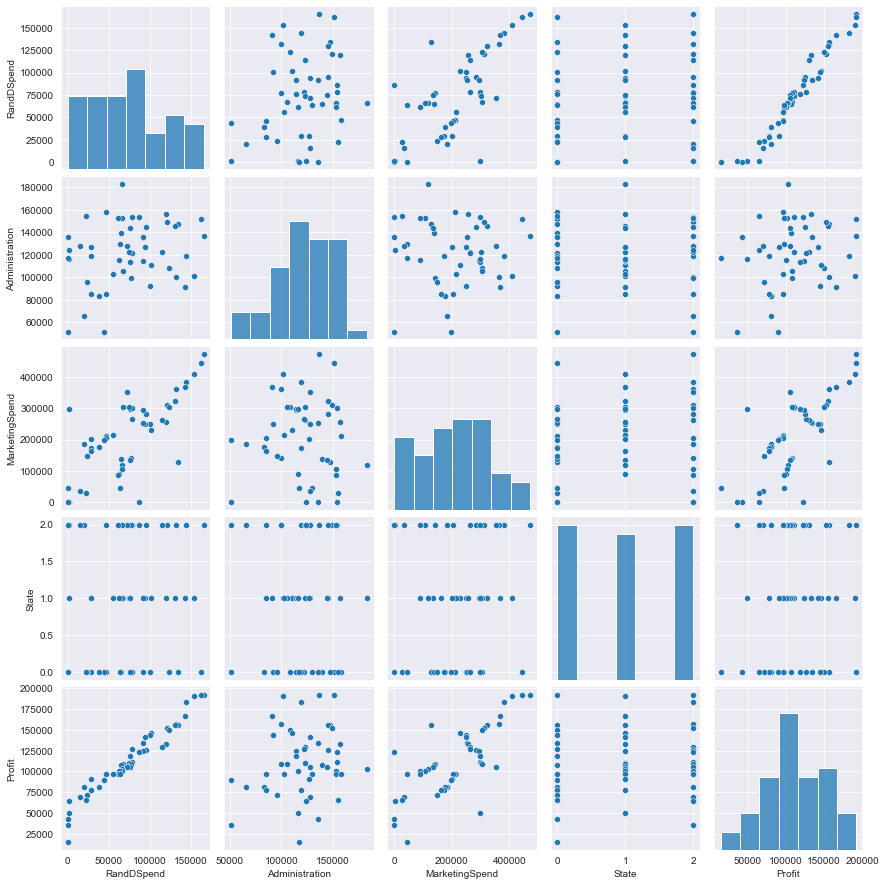

In [10]:
# Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [11]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RandDSpend+Administration+MarketingSpend+State',data=startup).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           8.51e-29
Time:                        22:24:44   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RandDSpend         0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
MarketingSpend     0.0272      0.017      1.637      0.109      -0.006       0.061
State            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model.params # Coefficents

Intercept         50142.506443
RandDSpend            0.805760
Administration       -0.026826
MarketingSpend        0.027228
State               -22.320577
dtype: float64

print(model.tvalues, '\n',model.pvalues) # t and p values

In [13]:
(model.rsquared, model.rsquared_adj) # r square and adjusted r square values

(0.9507462044842656, 0.9463680893273114)

## Simple Linear Regression models

In [14]:
ml_rd=smf.ols('Profit~RandDSpend', data=startup).fit()
print(ml_rd.tvalues, '\n', ml_rd.pvalues) # t and p values

Intercept     19.320288
RandDSpend    29.151139
dtype: float64 
 Intercept     2.782697e-24
RandDSpend    3.500322e-32
dtype: float64


In [15]:
ml_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           3.50e-32
Time:                        22:24:45   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RandDSpend     0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
ml_mar=smf.ols('Profit~MarketingSpend',data=startup).fit()
print(ml_mar.tvalues, '\n',ml_mar.pvalues) # t and p values

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [17]:
ml_mar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           4.38e-10
Time:                        22:24:45   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
ml_rm=smf.ols('RandDSpend~MarketingSpend',data=startup).fit()
print(ml_rm.tvalues, '\n',ml_rm.pvalues)# t and p values

Intercept         1.799453
MarketingSpend    7.276942
dtype: float64 
 Intercept         7.823470e-02
MarketingSpend    2.769808e-09
dtype: float64


In [19]:
ml_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RandDSpend   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     52.95
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           2.77e-09
Time:                        22:24:45   Log-Likelihood:                -588.57
No. Observations:                  50   AIC:                             1181.
Df Residuals:                      48   BIC:                             1185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.635e+04   9088.562      1.799      0.078   -1919.340    3.46e+04
MarketingSpend     0.2719      0.037      7.277      0.000       0.197       0.347
==============================================================================
Omnibus:                        2.320   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.512
Skew:                          -0.128   Prob(JB):                        0.469
Kurtosis:                       3.813   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
ml_rmp=smf.ols('Profit~RandDSpend+MarketingSpend',data=startup).fit()
print(ml_rmp.tvalues, '\n',ml_rmp.pvalues) # t and p values

Intercept         17.463582
RandDSpend        19.265555
MarketingSpend     1.927052
dtype: float64 
 Intercept         3.504062e-22
RandDSpend        6.040433e-24
MarketingSpend    6.003040e-02
dtype: float64


In [21]:
ml_rmp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           2.16e-31
Time:                        22:24:45   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RandDSpend         0.7966      0.041     19.266      0.000       0.713       0.880
MarketingSpend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculating VIF 

In [22]:
rsq_adm=smf.ols('Administration~RandDSpend+MarketingSpend+State', data=startup).fit().rsquared
vif_adm=1/(1-rsq_adm) # 1.175
rsq_rd=smf.ols('RandDSpend~Administration+MarketingSpend+State',data=startup).fit().rsquared
vif_rd=1/(1-rsq_rd) # 2.481
rsq_mar=smf.ols('MarketingSpend~Administration+RandDSpend+State',data=startup).fit().rsquared
vif_mar=1/(1-rsq_mar) # 2.327
rsq_st=smf.ols('State~Administration+RandDSpend+MarketingSpend',data=startup).fit().rsquared
vif_st=1/(1-rsq_st) # 1.011

# Storing Vif values in dataframe
dd={'Variables':['Administration','RandDSpend','MarketingSpend','State'], 'VIF':[vif_adm,vif_rd,vif_mar,vif_st]}
Vif_frame=pd.DataFrame(dd)
Vif_frame


,Variables,VIF
0,Administration,1.175315
1,RandDSpend,2.481178
2,MarketingSpend,2.326780
3,State,1.011281


## Residual Analysis 

## Test for Normality of Residuals (Q-Q Plot)

In [23]:
model.resid # Shows the error values of the observation

0      -240.934416
1      2609.393955
2      8899.431581
3      9224.499382
4     -5954.860630
5     -6570.087958
6     -2016.402125
7     -4271.004155
8       490.611791
9     -5149.346740
10    10611.576482
11     8661.886997
12    12446.641369
13     6796.378735
14   -16947.693104
15   -16297.587589
16    10055.036102
17    -4800.428034
18    -4748.168968
19     7163.632009
20     1811.887956
21    -5983.963770
22    -4354.693173
23    -1262.466061
24    -4788.999732
25     5144.849591
26    -4866.912270
27    -9377.248176
28     1623.265402
29     -767.388601
30      485.636602
31     -181.152734
32    -1595.336763
33    -1135.453688
34     7652.782939
35     5991.106571
36    15424.078702
37      307.906968
38    11555.779367
39    -2744.396769
40     3403.599361
41     2997.938430
42      857.718955
43     9616.848808
44      569.213149
45    17300.941187
46    -6672.246236
47    -3949.833956
48   -13473.163247
49   -33552.873495
dtype: float64

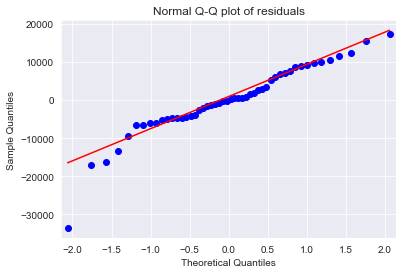

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model.resid< -30000)) # shows points where the errors are less than -30000 (in which observation)

[array([49], dtype=int64)]

## Residual Plot for Homoscadesticity

In [26]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

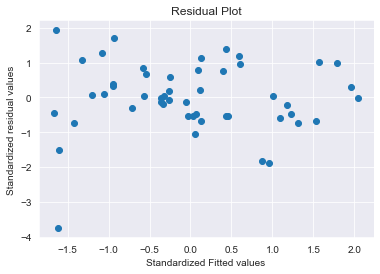

In [27]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressor

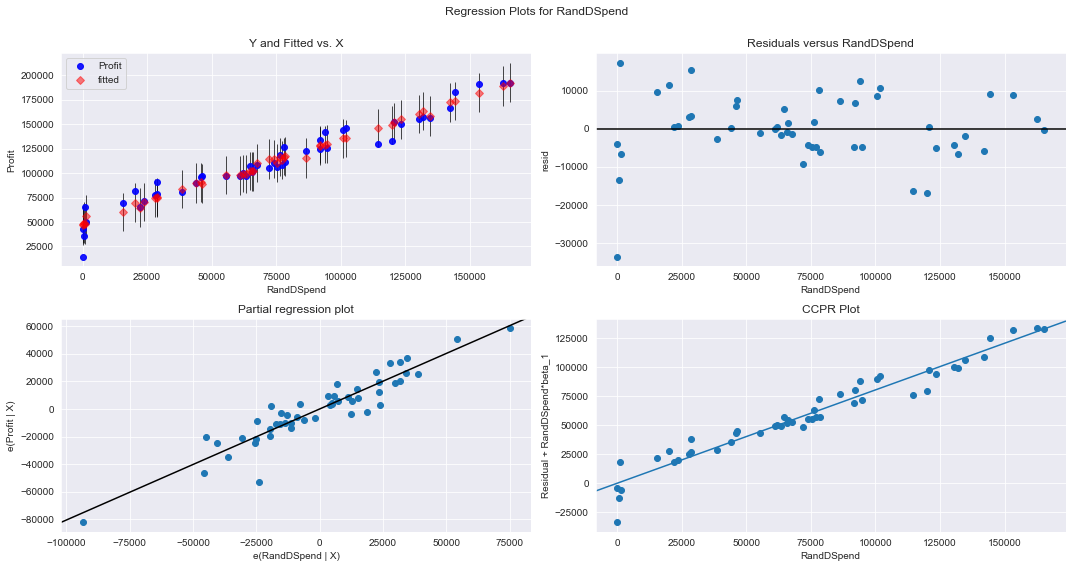

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RandDSpend", fig=fig)
plt.show()

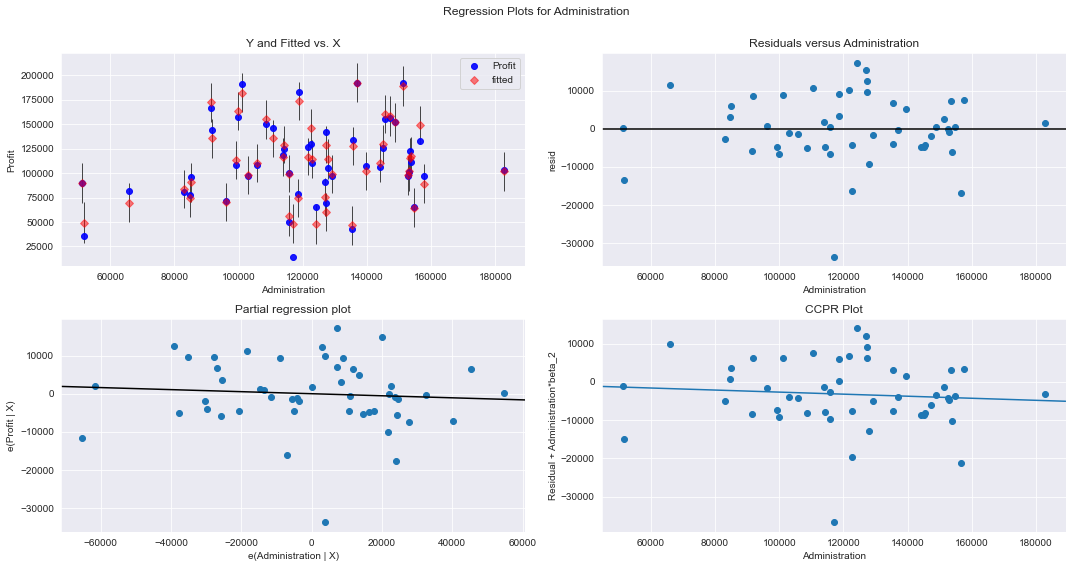

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

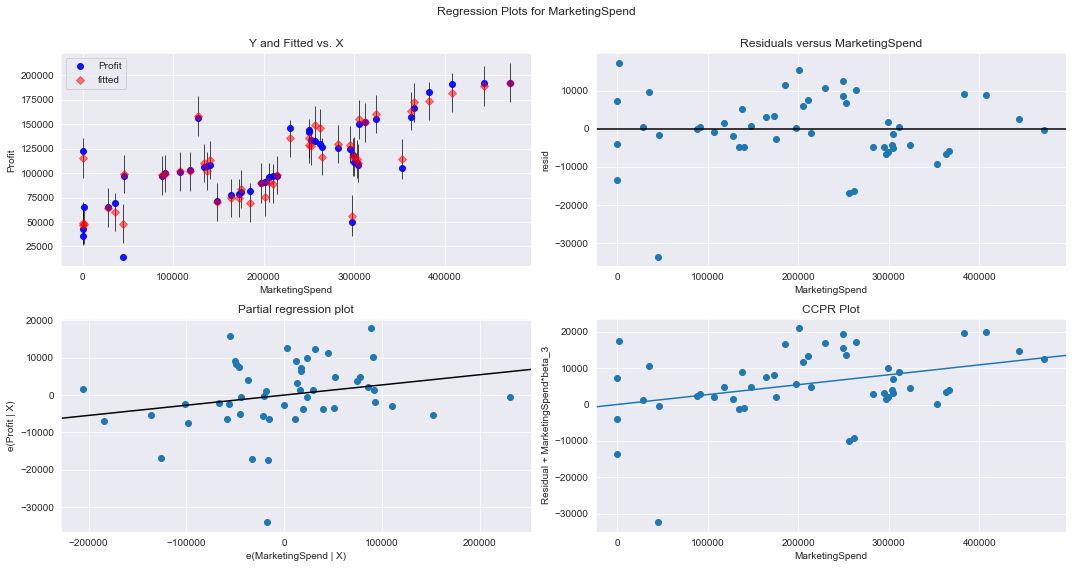

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

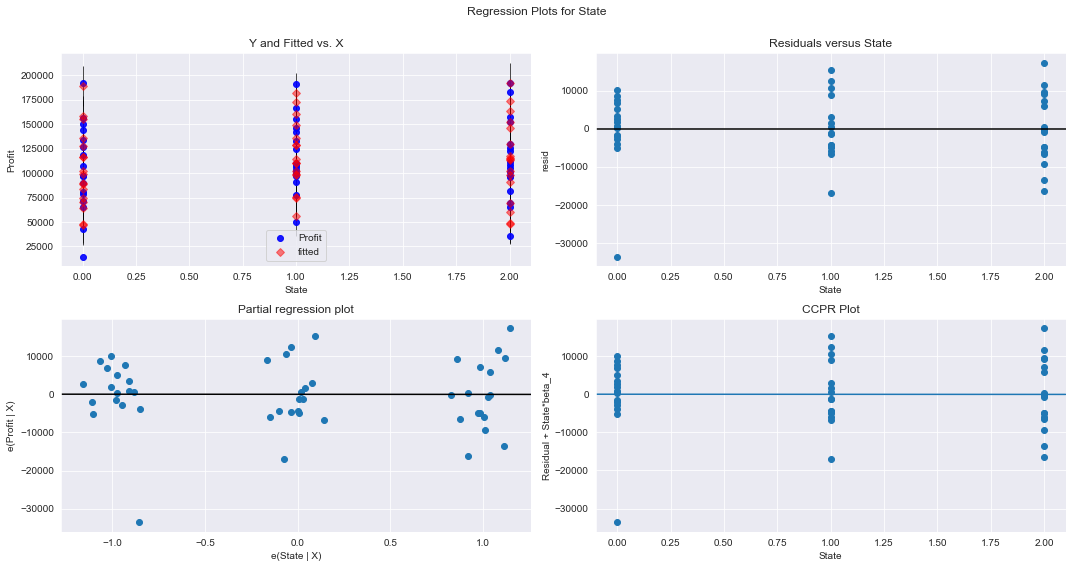

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State", fig=fig)
plt.show()

## Model Deletion Diagnostics¶
## Detecting Influencers/Outliers
## Cook’s Distance

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [33]:
K=4
N=50
3*(K+1)/N

0.3

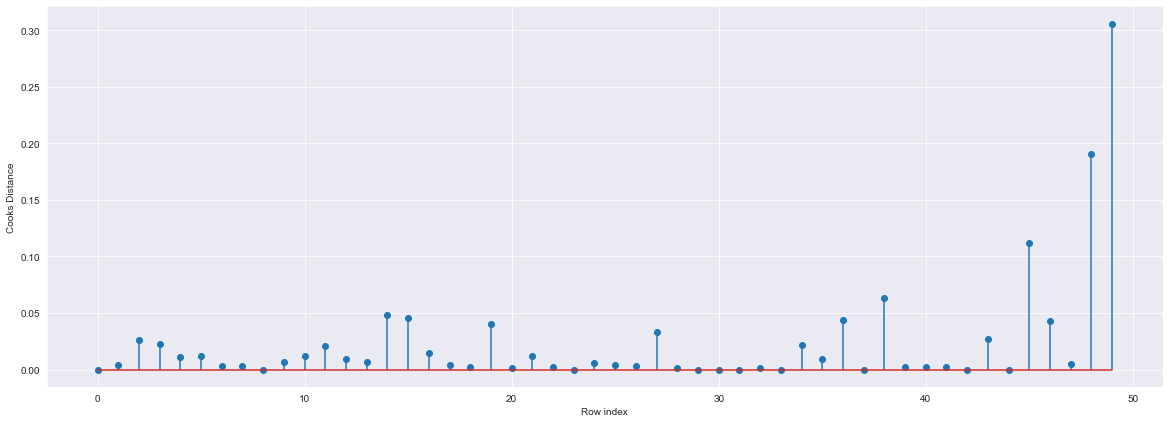

In [34]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
#index and value of influencer where c is more than .3
(np.argmax(c),np.max(c))

(49, 0.3060281954699336)

## High Influence points

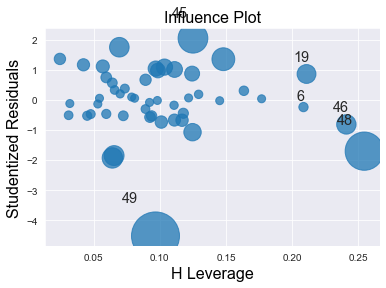

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [37]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [38]:
startup[startup.index.isin([49])]

,RandDSpend,Administration,MarketingSpend,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


In [39]:
startup.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## As per the above Cooks distance and influence plot we can conclude that there is no
## influence points in our data set as the max point is lying below the leverage cutoff of 
## 0.36

## Improving the model
## Build model

In [40]:
final_ml= smf.ols('Profit~RandDSpend+MarketingSpend+Administration+State',data = startup).fit() 

In [41]:
(final_ml.rsquared,final_ml.aic)

(0.9507462044842656, 1060.7712849964787)

In [42]:
final_ml.summary() # By looking at the summary we can say that this is the best model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           8.51e-29
Time:                        22:24:50   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RandDSpend         0.8058      0.046     17.609      0.000       0.714       0.898
MarketingSpend     0.0272      0.017      1.637      0.109      -0.006       0.061
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
State            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predicting for new data

In [45]:
new_data=pd.DataFrame({'RandDSpend':158060,'MarketingSpend':36055,'Administration':155009,'State':2},index=[1] )
new_data

,RandDSpend,MarketingSpend,Administration,State
1,158060,36055,155009,2


In [46]:
final_ml.predict(new_data)

1    174279.68482
dtype: float64

In [47]:
final_ml.predict(startup.iloc[0:5,])

0    192502.764416
1    189182.666045
2    182150.958419
3    173677.490618
4    172142.800630
dtype: float64

In [48]:
startup.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [50]:
pred_y=final_ml.predict(startup)
pred_y

0     192502.764416
1     189182.666045
2     182150.958419
3     173677.490618
4     172142.800630
5     163561.207958
6     158138.912125
7     160023.604155
8     151721.158209
9     154909.306740
10    135510.373518
11    135597.513003
12    129138.878631
13    127510.971265
14    149550.343104
15    146214.627589
16    116937.893898
17    130170.798034
18    129015.068968
19    115613.227991
20    116662.142044
21    117296.983770
22    114706.943173
23    109996.456061
24    113341.039732
25    102259.490409
26    110600.452270
27    114385.558176
28    101659.114598
29    101772.028601
30     99451.953398
31     97664.712734
32     99023.176763
33     97914.373688
34     89060.017061
35     90488.403429
36     75284.111298
37     89641.233032
38     69673.280633
39     83750.156769
40     74836.310639
41     74800.891570
42     70640.771045
43     60142.131192
44     64631.116851
45     47625.138813
46     56162.996236
47     46509.563956
48     49146.573247
49     48234.273495
